# Analysis
### Trend 1: Urban area has the most riders, drivers, and fares
### Trend 2: Rural area has the least riders and drivers.
### Trend 3: This type of rides can seem to make more sense in the urban areas and not the suburban and rural areas.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.patches as mpatches

# Read the City and Ride Data
City_Data = pd.read_csv("data/city_data.csv")
Ride_Data = pd.read_csv("data/ride_data.csv")

#City_Data.head()
#Ride_Data.head()

# Combine the data into a single dataset
CityAndRide = pd.merge(Ride_Data,City_Data,how='left',on='city')

# Display the data table for preview
CityAndRide.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

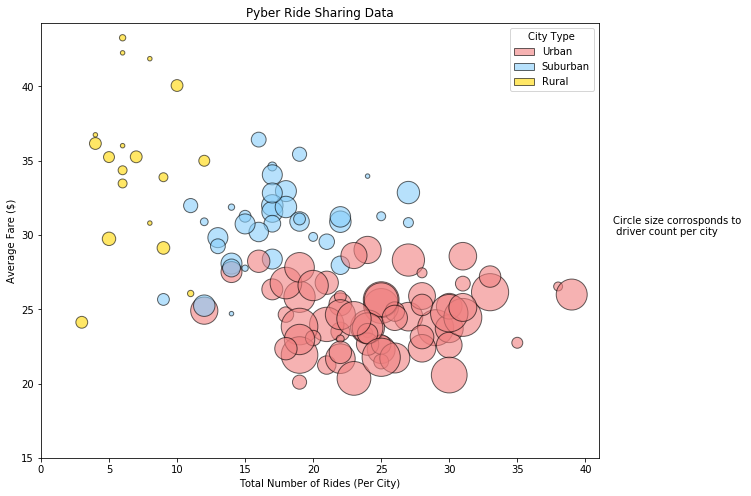

In [2]:
# Obtain the x and y coordinates for each of the three city types
CityRideGroupBy = CityAndRide.groupby(['city']+['type']+['driver_count'])
Avg_Fare = CityRideGroupBy['fare'].mean()
Total_Rides = CityRideGroupBy['ride_id'].count()
CityRide_df = pd.DataFrame({"Average Fare":Avg_Fare, "Total Rides":Total_Rides})
CityRide_df = CityRide_df.reset_index()

# Build the scatter plots for each city types
colors = {'Urban':'lightcoral', 'Suburban':'lightskyblue', 'Rural':'gold'}

# Incorporate the other graph properties

U = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
R = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(CityRide_df['Total Rides'], CityRide_df['Average Fare'], s=CityRide_df['driver_count']*20, c=CityRide_df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

ax.set_xlim(0, max(CityRide_df['Total Rides'])+2)
ax.set_ylim(15, max(CityRide_df['Average Fare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data")
ax.text(42,30,'Circle size corrosponds to \n driver count per city')

plt.show()

# Save Figure


In [13]:
# Show plot
plt.show()
# Save the plot
plt.savefig("data/TotalRideSharingPerCity.png")

## Total Fares by City Type

In [4]:
# calculate variables that will be used in the Pie Chart
GType = CityAndRide.groupby(['type'])
GGType = City_Data.groupby(['type'])

# Calculate Total fare($) Per CityType
TFare = GType['fare'].sum()

# Calculate Total Rides Per CityType
TRides = GType['ride_id'].count()

# Calculate Total Drivers Per CityType
TDrivers = GGType['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1

# Save Figure


,type,TotalDrivers,TotalFare,TotalRides
0,Rural,78,4327.93,125
1,Suburban,490,19356.33,625
2,Urban,2405,39854.38,1625


In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Fares by City Type')

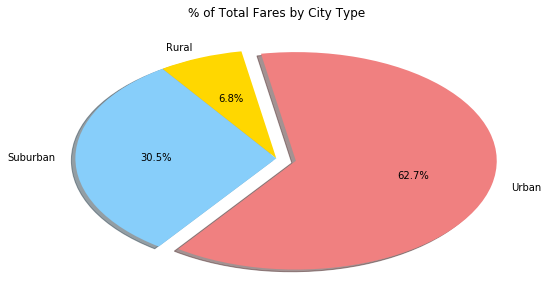

In [6]:
# Plot % of Fares by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalFare']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
# Update Title
plt.title("% of Total Fares by City Type")
# Prints our pie chart to the screen



# Save Figure


In [12]:
# Show Figure
plt.show()
# Save the plot
plt.savefig("data/TotalRidesbyCityType.png")

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

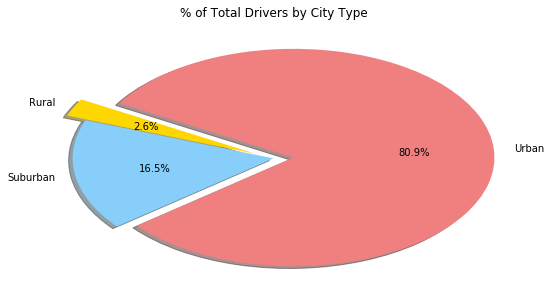

In [8]:
# Plot % of Total Drivers by City Type
# Labels for the sections of our pie chart
labels = df1['type']

# The values of each section of the pie chart
sizes = df1['TotalDrivers']

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0.1)

# Creates the pie chart based upon the values above 
# update graph size 
# Automatically finds the percentages of each part of the pie chart
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
            
# Update Title
plt.title("% of Total Drivers by City Type")

# Save Figure


In [9]:
# Show Figure
plt.show()

In [11]:
# Save the plot
plt.savefig("data/TotalDriversbyCityType.png")